# Crime Data Analysis in the USA (1979-2020)

This project involves analyzing crime data in the USA from 1979 to 2020. The main tasks include:

1. **Importing Necessary Libraries**
2. **Loading and Cleaning the Dataset**
3. **Handling Missing Values**
4. **Calculating Total Number of Crimes and Crime Rates per 100,000 People**
5. **Visualizing Data with an Animated Choropleth Map**

The goal is to illustrate crime rate trends over time across different states.


## 1. Importing the necessary libraries required for our analysis.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

## 2. Loading the dataset. Understanding the structure and contents of our dataset.

In [2]:
df = pd.read_csv("estimated_crimes_1979_2020.csv")
df.head()

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,NaN,NaN,220099000,1208030,21460,76390.0,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN
1,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.0,NaN,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.0,NaN,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.0,NaN,4305,8884,177977,48916,116976,12085,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 2184 non-null   int64  
 1   state_abbr           2142 non-null   object 
 2   state_name           2142 non-null   object 
 3   population           2184 non-null   int64  
 4   violent_crime        2184 non-null   int64  
 5   homicide             2184 non-null   int64  
 6   rape_legacy          1976 non-null   float64
 7   rape_revised         416 non-null    float64
 8   robbery              2184 non-null   int64  
 9   aggravated_assault   2184 non-null   int64  
 10  property_crime       2184 non-null   int64  
 11  burglary             2184 non-null   int64  
 12  larceny              2184 non-null   int64  
 13  motor_vehicle_theft  2184 non-null   int64  
 14  caveats              71 non-null     object 
dtypes: float64(2), int64(10), object(3)
me

## 3. Preparing the Data.

***
 * From our initial exploration of the dataset, we observed that there are null values present in the `state_abbr` and `state_name` columns. These null values can result in misinterpretation of data, especially when visualizing or summarizing information by state. Let's investigate the missing values in these columns to determine the best approach for handling them.
***


In [3]:
null_state = df[(df['state_name'].isnull()) & (df['state_abbr'].isnull())].head(10)
null_state

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1979,NaN,NaN,220099000,1208030,21460,76390.0,NaN,480700,629480,11041500,3327700,6601000,1112800,NaN
52,1980,NaN,NaN,225349264,1344520,23040,82990.0,NaN,565840,672650,12063700,3795200,7136900,1131700,NaN
104,1981,NaN,NaN,229465714,1361820,22520,82500.0,NaN,592910,663900,12061900,3779700,7194400,1087800,NaN
156,1982,NaN,NaN,231664458,1322390,21010,78770.0,NaN,553130,669480,11652000,3447100,7142500,1062400,NaN
208,1983,NaN,NaN,233791994,1258087,19308,78918.0,NaN,506567,653294,10850543,3129851,6712759,1007933,NaN
260,1984,NaN,NaN,235824902,1273282,18692,84233.0,NaN,485008,685349,10608473,2984434,6591874,1032165,NaN
312,1985,NaN,NaN,237923795,1327767,18976,87671.0,NaN,497874,723246,11102590,3073348,6926380,1102862,NaN
364,1986,NaN,NaN,240132887,1489169,20613,91459.0,NaN,542775,834322,11722700,3241410,7257153,1224137,NaN
416,1987,NaN,NaN,242288918,1483999,20096,91111.0,NaN,517704,855088,12024709,3236184,7499851,1288674,NaN
468,1988,NaN,NaN,244498982,1566221,20675,92486.0,NaN,542968,910092,12356865,3218077,7705872,1432916,NaN


***
 * Upon investigating the missing values, we realized that the dataset contains rows with the cumulative number of crimes for every year for all states together. This is why the `state_name` and `state_abbr` columns have null values in these rows. 
    For our purposes of creating an animated chloroplast map, we do not need the cumulative data for all states together. Therefore, we can safely delete these rows to ensure that our dataset is clean and ready for analysis.
***

In [4]:
df.dropna(subset=['state_name', 'state_abbr'], inplace=True)
df.head(10)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1,1979,AK,Alaska,406000,1994,54,292.0,NaN,445,1203,23193,5616,15076,2501,NaN
2,1979,AL,Alabama,3769000,15578,496,1037.0,NaN,4127,9918,144372,48517,83791,12064,NaN
3,1979,AR,Arkansas,2180000,7984,198,595.0,NaN,1626,5565,70949,21457,45267,4225,NaN
4,1979,AZ,Arizona,2450000,14528,219,1120.0,NaN,4305,8884,177977,48916,116976,12085,NaN
5,1979,CA,California,22696000,184087,2952,12239.0,NaN,75767,93129,1511021,496310,847148,167563,NaN
6,1979,CO,Colorado,2772000,14472,161,1472.0,NaN,4353,8486,180984,49741,117898,13345,NaN
7,1979,CT,Connecticut,3115000,12902,131,752.0,NaN,6021,5998,167131,48229,96997,21905,NaN
8,1979,DC,District of Columbia,656000,10553,180,489.0,NaN,6920,2964,45877,13452,28819,3606,NaN
9,1979,DE,Delaware,582000,3127,33,162.0,NaN,753,2179,34853,8890,23081,2882,NaN
10,1979,FL,Florida,8860000,73881,1084,4576.0,NaN,22097,46124,607281,190884,378099,38298,NaN


***
* Handling missing values in `rape_revised` , `rape_legacy`, `caveats` columns and ensure that columns have the desired data types for further analysis.
***

In [5]:
df['rape_revised'] = df['rape_revised'].fillna(0).astype(int)
df['rape_legacy'] = df['rape_legacy'].fillna(0).astype(int)
df['caveats'] = df['caveats'].fillna(0)
df.head(10)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
1,1979,AK,Alaska,406000,1994,54,292,0,445,1203,23193,5616,15076,2501,0
2,1979,AL,Alabama,3769000,15578,496,1037,0,4127,9918,144372,48517,83791,12064,0
3,1979,AR,Arkansas,2180000,7984,198,595,0,1626,5565,70949,21457,45267,4225,0
4,1979,AZ,Arizona,2450000,14528,219,1120,0,4305,8884,177977,48916,116976,12085,0
5,1979,CA,California,22696000,184087,2952,12239,0,75767,93129,1511021,496310,847148,167563,0
6,1979,CO,Colorado,2772000,14472,161,1472,0,4353,8486,180984,49741,117898,13345,0
7,1979,CT,Connecticut,3115000,12902,131,752,0,6021,5998,167131,48229,96997,21905,0
8,1979,DC,District of Columbia,656000,10553,180,489,0,6920,2964,45877,13452,28819,3606,0
9,1979,DE,Delaware,582000,3127,33,162,0,753,2179,34853,8890,23081,2882,0
10,1979,FL,Florida,8860000,73881,1084,4576,0,22097,46124,607281,190884,378099,38298,0


***
*  Calculating the total number of crimes by summing across all relevant numeric columns in each row. To ensure the `population`, `year`, and `violent_crime` (which includes four different types of crimes) columns are excluded from this calculation, we first convert them to strings.
***
 

In [8]:
df['population'] = df['population'].apply(str)
df['year'] = df['year'].apply(str)
df['violent_crime'] = df['violent_crime'].apply(str)
df['Number_of_crimes'] = df.sum(axis=1, numeric_only=True).astype(int)
df.head(10)

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats,Number_of_crimes
1,1979,AK,Alaska,406000,1994,54,292,0,445,1203,23193,5616,15076,2501,0,48380
2,1979,AL,Alabama,3769000,15578,496,1037,0,4127,9918,144372,48517,83791,12064,0,304322
3,1979,AR,Arkansas,2180000,7984,198,595,0,1626,5565,70949,21457,45267,4225,0,149882
4,1979,AZ,Arizona,2450000,14528,219,1120,0,4305,8884,177977,48916,116976,12085,0,370482
5,1979,CA,California,22696000,184087,2952,12239,0,75767,93129,1511021,496310,847148,167563,0,3206129
6,1979,CO,Colorado,2772000,14472,161,1472,0,4353,8486,180984,49741,117898,13345,0,376440
7,1979,CT,Connecticut,3115000,12902,131,752,0,6021,5998,167131,48229,96997,21905,0,347164
8,1979,DC,District of Columbia,656000,10553,180,489,0,6920,2964,45877,13452,28819,3606,0,102307
9,1979,DE,Delaware,582000,3127,33,162,0,753,2179,34853,8890,23081,2882,0,72833
10,1979,FL,Florida,8860000,73881,1084,4576,0,22097,46124,607281,190884,378099,38298,0,1288443


***
* To calculate a crime rate, dividing `Number_of_crimes` committed in the state by the `population`, then multiply by 100,000.
***

In [9]:
df['population'] = df['population'].apply(int)
df['year'] = df['year'].apply(int)
df['violent_crime'] = df['violent_crime'].apply(int)
df['Crime_rate_per_100k'] = round(df['Number_of_crimes'] / (df['population']/100000),0).astype(int)
df.head(10)  

,year,state_abbr,state_name,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats,Number_of_crimes,Crime_rate_per_100k
1,1979,AK,Alaska,406000,1994,54,292,0,445,1203,23193,5616,15076,2501,0,48380,11916
2,1979,AL,Alabama,3769000,15578,496,1037,0,4127,9918,144372,48517,83791,12064,0,304322,8074
3,1979,AR,Arkansas,2180000,7984,198,595,0,1626,5565,70949,21457,45267,4225,0,149882,6875
4,1979,AZ,Arizona,2450000,14528,219,1120,0,4305,8884,177977,48916,116976,12085,0,370482,15122
5,1979,CA,California,22696000,184087,2952,12239,0,75767,93129,1511021,496310,847148,167563,0,3206129,14126
6,1979,CO,Colorado,2772000,14472,161,1472,0,4353,8486,180984,49741,117898,13345,0,376440,13580
7,1979,CT,Connecticut,3115000,12902,131,752,0,6021,5998,167131,48229,96997,21905,0,347164,11145
8,1979,DC,District of Columbia,656000,10553,180,489,0,6920,2964,45877,13452,28819,3606,0,102307,15596
9,1979,DE,Delaware,582000,3127,33,162,0,753,2179,34853,8890,23081,2882,0,72833,12514
10,1979,FL,Florida,8860000,73881,1084,4576,0,22097,46124,607281,190884,378099,38298,0,1288443,14542


***
* Determining the overall minimum and maximum values of the `Crime_rate_per_100k` column across all states for setting a proper color range in a map visualization.
***

In [10]:
min_max = df.groupby('state_name')['Crime_rate_per_100k'].agg(['min', 'max'])
overall_min = min_max['min'].min()
overall_max = min_max['max'].max()
print(overall_min, overall_max)

2344 21686


## 4. Creating the Animated Chloropleth Map.

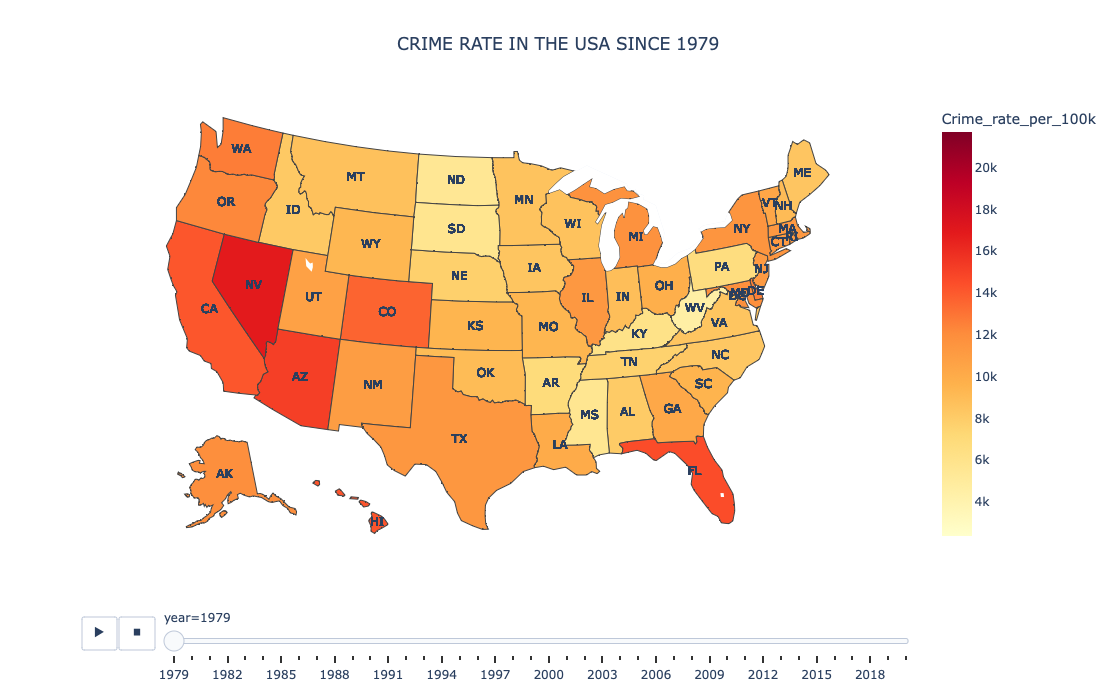

In [16]:
import plotly.express as px

fig = px.choropleth(data_frame=df,
                    locations='state_abbr',
                    locationmode='USA-states',
                    color = 'Crime_rate_per_100k',
                    color_continuous_scale='YlOrRd',
                    title = "CRIME RATE IN THE USA SINCE 1979",
                    animation_frame = 'year',
                    hover_data={'year': False, 'state_name':True,'Number_of_crimes': False, 'state_abbr': False, 'population':False, 'Crime_rate_per_100k':True},
                    range_color=[2344,21686],
                    projection='albers usa')

fig.add_scattergeo(
    locations=df['state_abbr'],
    locationmode="USA-states",
    hoverinfo = 'none',
    marker_size = 50,
    text=df['state_abbr'],
    mode='text',
)
fig.update_layout(title_text='CRIME RATE IN THE USA SINCE 1979', title_x=0.5, height=700, width=1150)
